In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
products = pd.read_csv(r"Product_Master.csv")
inventory = pd.read_csv(r"Inventory_data.csv")
sale_service = pd.read_csv(r"Sales_service_data.csv")
store = pd.read_csv(r"Store_ref.csv")

In [ ]:
pi = products[["Unique_Product_ID"]].groupby(products["Category"]).count()
fig = plt.figure(figsize=(6,6),dpi=100)
plt.pie(pi["Unique_Product_ID"],labels=pi.index,autopct="%1.0f%%",startangle=90)
plt.show()

In [4]:
inv = inventory.where(inventory["Unique Store_ID"] == "Store 1").dropna().transpose()

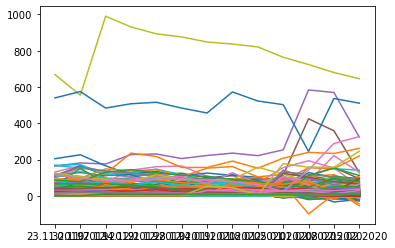

In [5]:
inv.columns = inv.iloc[1]
inv = inv.drop(inv.index[1])
inv = inv.drop(inv.index[0])
inv.head()
plt.plot(inv.index,inv)
plt.show()

iqr = 12.653846153846157, upper_bound = 35.86538461538462, lower_bound = -14.750000000000004


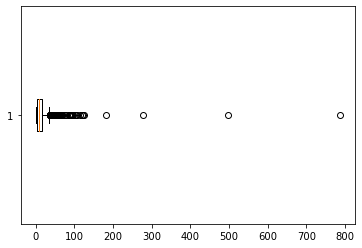

Outliers ['Product 735', 'Product 704', 'Product 702', 'Product 860', 'Product 289', 'Product 444', 'Product 729', 'Product 595', 'Product 484', 'Product 498', 'Product 24', 'Product 433', 'Product 258', 'Product 229', 'Product 541', 'Product 763', 'Product 423', 'Product 442', 'Product 432', 'Product 308', 'Product 691', 'Product 600', 'Product 774', 'Product 243', 'Product 264', 'Product 569', 'Product 773', 'Product 867', 'Product 703', 'Product 911', 'Product 472', 'Product 755', 'Product 277', 'Product 231', 'Product 267', 'Product 848', 'Product 839', 'Product 855', 'Product 941', 'Product 944', 'Product 847', 'Product 904', 'Product 459', 'Product 916', 'Product 784', 'Product 734', 'Product 909', 'Product 741', 'Product 756', 'Product 969', 'Product 895', 'Product 764', 'Product 810', 'Product 366', 'Product 797', 'Product 781', 'Product 37', 'Product 919', 'Product 279', 'Product 282', 'Product 664', 'Product 888', 'Product 538', 'Product 977', 'Product 933', 'Product 800', 'P

In [6]:
#find outliers in store 1
inv1 = inventory.where(inventory["Unique Store_ID"] == "Store 1").dropna()
inv1["avg"] = inv1.iloc[:, 2:15].mean(axis=1)
# finding the 1st quartile
q1 = np.quantile(inv1["avg"], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(inv1["avg"], 0.75)
med = np.median(inv1["avg"])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(f"iqr = {iqr}, upper_bound = {upper_bound}, lower_bound = {lower_bound}")
outliers = inv1["Unique Product_ID"].where(inv1["avg"]>upper_bound).dropna().to_list()
bx = plt.boxplot(inv1["avg"],vert=False)
plt.show()
print("Outliers",outliers)